<a href="https://colab.research.google.com/github/nagavarma9199/neural-networks/blob/main/ICP5_Ques1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
encoding_dim = 32

input_img = Input(shape=(784,))


hidden_1 = Dense(64, activation='relu')(input_img)


In [4]:
encoded = Dense(encoding_dim, activation='relu')(hidden_1)

In [5]:
hidden_2 = Dense(64, activation='relu')(encoded)

decoded = Dense(784, activation='sigmoid')(hidden_2)

In [6]:
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 6s 12ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 2/5
235/235 [==============================] - 3s 11ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 3/5
235/235 [==============================] - 3s 11ms/step - loss: 0.6945 - val_loss: 0.6944
Epoch 4/5
235/235 [==============================] - 3s 12ms/step - loss: 0.6943 - val_loss: 0.6943
Epoch 5/5
235/235 [==============================] - 4s 15ms/step - loss: 0.6942 - val_loss: 0.6941


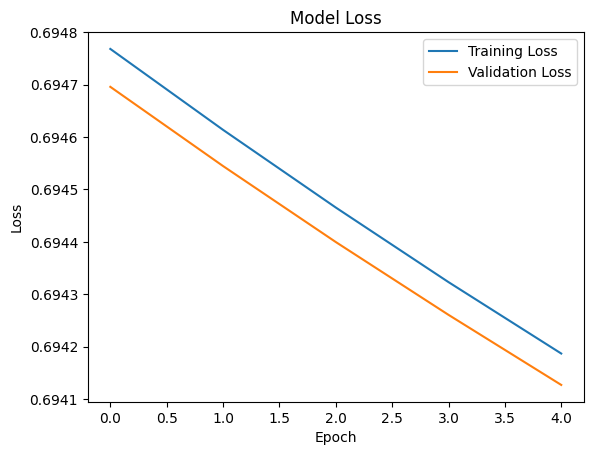

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 2s 5ms/step


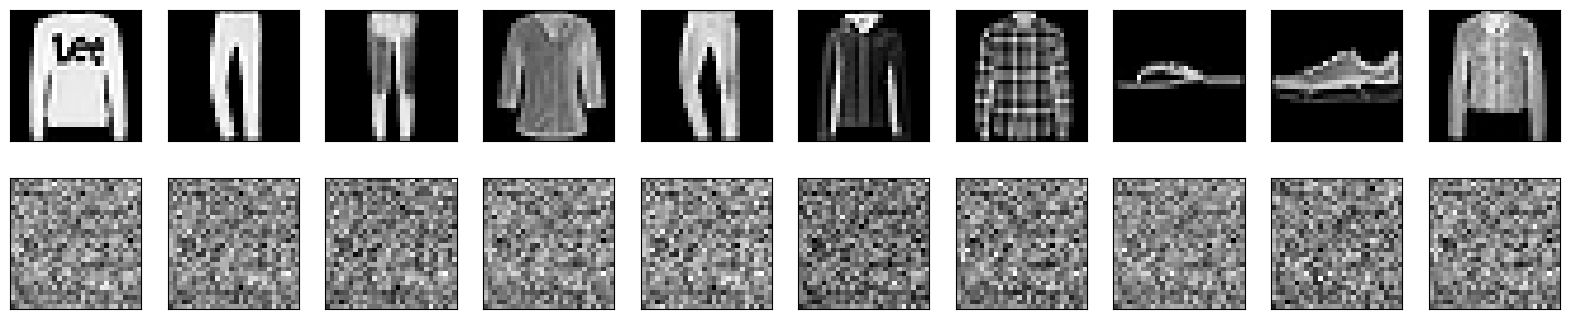

In [11]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):

    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()